In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import jarque_bera

In [2]:
derived_normal_data = np.random.normal(size=1000)
derived_gamma_data = np.random.gamma(3, size=1000)

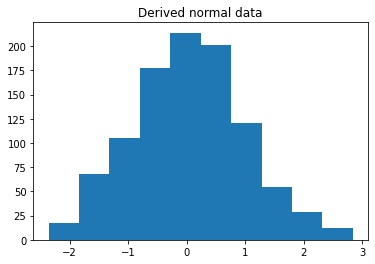

In [3]:
plt.hist(derived_normal_data)
plt.title('Derived normal data')
plt.show()

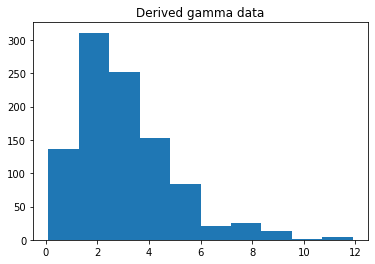

In [4]:
plt.hist(derived_gamma_data)
plt.title('Derived gamma data')
plt.show()

# Shapiro Wilk

Is used to test if a random sample comes from a normal distribution. This test has more power than KS test. Arrays the sample values by size and measuing fit against means, variances and covariances. These are compared against normality. Unfortunately, the test has a bias by sample size. The larger the sample, the more likely you will get a statistically significant result. In general, this test is not as reliable with n > 2000.

In [5]:
def test_shapiro_wilk(data, alpha=0.05):
    stat, p = shapiro(data)
    p = round(p,4)
    if p > alpha:
        print(f'shapiro: data follows normal {p}')
    else:
        print(f'shaprio: data not normal {p}')

In [6]:
test_shapiro_wilk(derived_normal_data)
test_shapiro_wilk(derived_gamma_data)

shapiro: data follows normal 0.0717
shaprio: data not normal 0.0


# Kolmogorov Smirnov

More general test, but less powerful. Meaning that it correctly rejects the null hypothesis of normality less often.
This test compares the expected cumulative distribution agains thte empirical cumulative distribution. Therefore, it is sensitive at the center of the distribution, but not the tails.

<b> In general, use the SW test, then KS as a backup <b>

In [7]:
def test_kolmogorov_smirnov(data, alpha=0.05):
    ks_results = kstest(data, 'norm')
    p = ks_results.pvalue
    p = round(p,4)
    if p > alpha:
        print(f'kolmogorov smirnov: data follows normal {p}')
    else:
        print(f'kolmogorov smirnov: data not normal {p}')

In [8]:
test_kolmogorov_smirnov(derived_normal_data)
test_kolmogorov_smirnov(derived_gamma_data)

kolmogorov smirnov: data follows normal 0.1381
kolmogorov smirnov: data not normal 0.0


# Jarque Bera

Another test for normality, but test mathches the skewness and kurtosis of data to see if it matches a normal distribution. We do not need to know the mean or standard deviation for the data in order to run the test.

A normal distribution has:
 - A skew of zero
 - A kurtosis of three


In [9]:
def test_jarque_bera(data, alpha=0.05):
    test_stat, p = jarque_bera(data)
    p = round(p,4)
    if p > alpha:
        print(f'jarque_bera: data follows normal {p}')
    else:
        print(f'jarque_bera: data not normal {p}')

In [10]:
test_jarque_bera(derived_normal_data)
test_jarque_bera(derived_gamma_data)

jarque_bera: data follows normal 0.2936
jarque_bera: data not normal 0.0
